In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('/Users/chengchen/Documents/GitHub/Analyzing-COVID19-Search-Trends-and-Hospitalization/merged_dataset.csv')

In [3]:
df = df.reset_index()

In [4]:
df = df.sample(frac = 1) 

In [5]:
X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])

In [6]:
y = df['hospitalized_new'].values

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [8]:
neighbors = np.arange(1, 30)
mse = []
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    mse.append(-1*scores.mean()) 


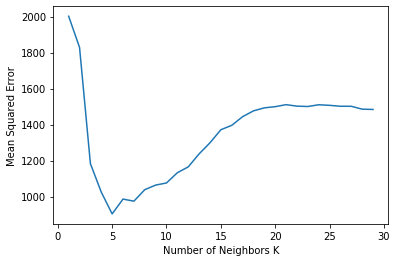

5


In [9]:
#convention: higher values better than lower values
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Mean Squared Error")
plt.show()
best_k = neighbors[mse.index(min(mse))]
print(best_k)

In [10]:
#split based on date
df['Date'] = pd.to_datetime(df['date'])
df = df.set_index('Date')
X = df.drop(columns=['Unnamed: 0','open_covid_region_code','country_region_code',
                    'country_region_code','country_region','sub_region_1','date','hospitalized_new'])
y = df['hospitalized_new']
X_train = X[:'2020-08-10']
X_validation = X['2020-08-17':]
y_train = y[:'2020-08-10'].values 
y_validation = y['2020-08-17':].values

In [11]:
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train,y_train)
pred=knn_regressor.predict(X_validation)
mse = ((pred - y_validation)**2).mean(axis=None)
print(mse)

740.5350000000001
